In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [17]:
#from colors import *
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(25, 7), "xtick.bottom": True, "grid.linestyle": ":"})

### Preprocessing

In [18]:
PATH = "../data/0603_all"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [19]:
file_data = []
diff_means = []
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}")
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
    except:
        print(data_in, file)
    file_data.append(data_in)
    
data = pd.concat(file_data)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\1015052771.py:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data_in = pd.read_csv(f"{PATH}/{file}")


Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_bitblt_small_7b09114c-6ac9-4f3a-bf32-870c9ea6fbb9.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_getdbits_small_454d1363-16c4-47f4-9a8b-f5b7919aedee.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_getpixel_small_a5c0ada5-5e93-4a02-a287-e88c5de7ac55.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_none_small_87d762e5-e57f-4df3-baf9-3875e2aa2ce8.csv
Empty DataFrame
Columns: [Unnamed: 0]
Index: [] Godot_default_windup_fullscreen_small_912d64aa-3a74-4059-ac55-f5e529628ce9.csv


In [20]:
data = data[data['framework'] != 'glumpy_sdl']
data = data[data['framework'] != 'glumpy_glfw']
data = data[data['framework'] != 'glumpy_qt5']
data = data[data['framework'] != 'glumpy_pyglet']

In [21]:
nones = data[data['program'] == 'none']
runnings = data[data['program'] != 'none']
runnings_cleaned = runnings[runnings['fw'] != -1]
data = pd.concat([nones, runnings_cleaned])

In [22]:
#TODO: find another way for recignizing whether framework was started/has decorations/another issue occurred
data = data[data['ete'] > 200]

data['ete'] = data['ete'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000

data.loc[data.fw == -0.001, 'fw'] = -1
data.loc[data.program == 'windup_fullscreen', 'program'] = 'windup'
data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\315882506.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5.0 - small' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[data.fullscreen == 'small', 'fullscreen_mode'] = '5.0 - small'


In [23]:
framework_count = data['framework'].nunique()
sqrt = int(math.sqrt(framework_count)) + 1
framework_list = data['framework'].unique()

# Framework Latency

In [24]:
COLOR_DARK_BLUE = '#18206F'
COLOR_MEDIUMDARK_BLUE = '#3661AB'
COLOR_MEDIUMLIGHT_BLUE = '#5CABFF'
COLOR_LIGHT_BLUE = '#0FDFFF'

COLOR_GLUTROT = '#DA3C43'
COLOR_DARK_RED = '#EC6200'
COLOR_MEDIUM_RED = '#ff8f1c'
COLOR_LIGHT_RED = '#ffb412'

HEIDENELKE_1 = '#9c004b'
HEIDENELKE_2 = '#cc0063'
HEIDENELKE_3 = '#f50076'
HEIDENELKE_4 = '#ff3396'
PALETTE_HEIDENELKE = [HEIDENELKE_1, HEIDENELKE_2, HEIDENELKE_3, HEIDENELKE_4]

PALETTE_REDS = [COLOR_GLUTROT, COLOR_DARK_RED, COLOR_MEDIUM_RED, COLOR_LIGHT_RED]
PALETTE_REDS_SIMPLE = [COLOR_GLUTROT]

PALETTE_BLUES = [COLOR_DARK_BLUE, COLOR_MEDIUMDARK_BLUE, COLOR_MEDIUMLIGHT_BLUE, COLOR_LIGHT_BLUE]
PALETTE_BLUES_SIMPLE = [COLOR_DARK_BLUE, COLOR_LIGHT_BLUE]

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\1237262425.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


['windup', 'getpixel', 'bitblt', 'getdbits', 'windup', 'getpixel', 'bitblt', 'getdbits', 'windup', 'getpixel', 'bitblt', 'getdbits']


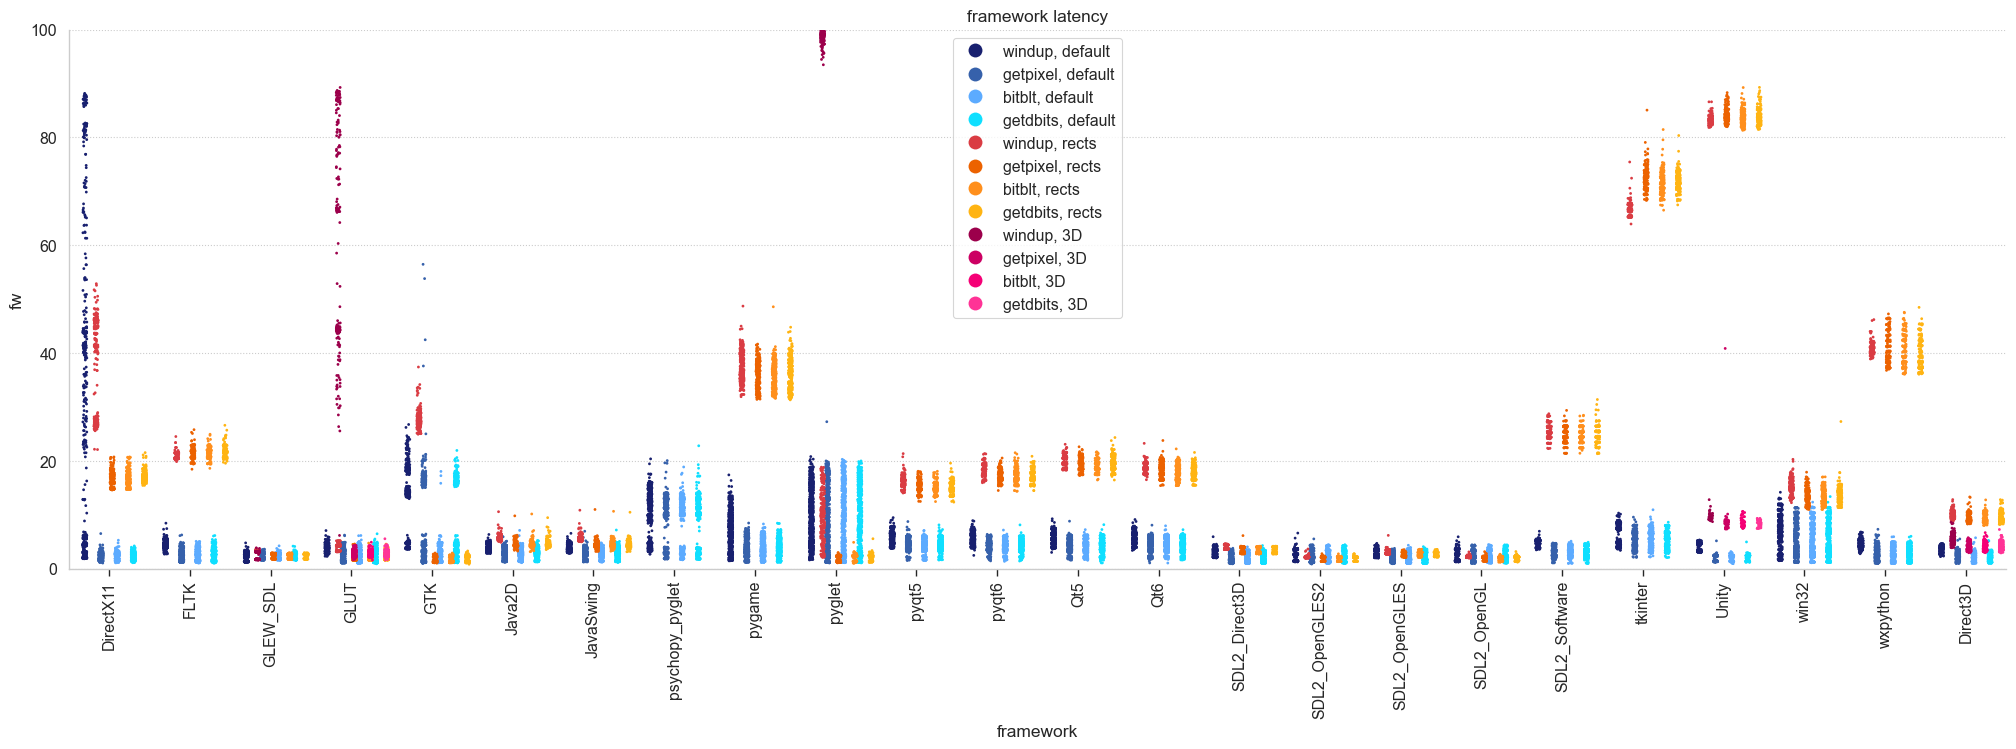

In [29]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

plot = sns.stripplot(data=data[data['complexity'] == 'default'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=2)
sns.stripplot(data=data[data['complexity'] == 'rects'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, transform=offset(0.1)+trans, size=2)
sns.stripplot(data=data[data['complexity'] == '3D'], x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, transform=offset(0.1)+trans, size=2)

plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.axes.set_ylim(0, 100)

handles, labels = plot.get_legend_handles_labels()

print(labels)
plot.legend(handles, [labels[0] + ', default', labels[1] + ', default',
                      labels[2] + ', default', labels[3] + ', default',
                      labels[4] + ', rects', labels[5] + ', rects',
                      labels[6] + ', rects', labels[7] + ', rects',
                      labels[8] + ', 3D', labels[9] + ', 3D',
                      labels[10] + ', 3D', labels[11] + ', 3D'], markerscale=5.)
plot.set_title('framework latency')
sns.despine(bottom = False, left = False)



### Framework Latencies per Complexity Condition Separately

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\58910804.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


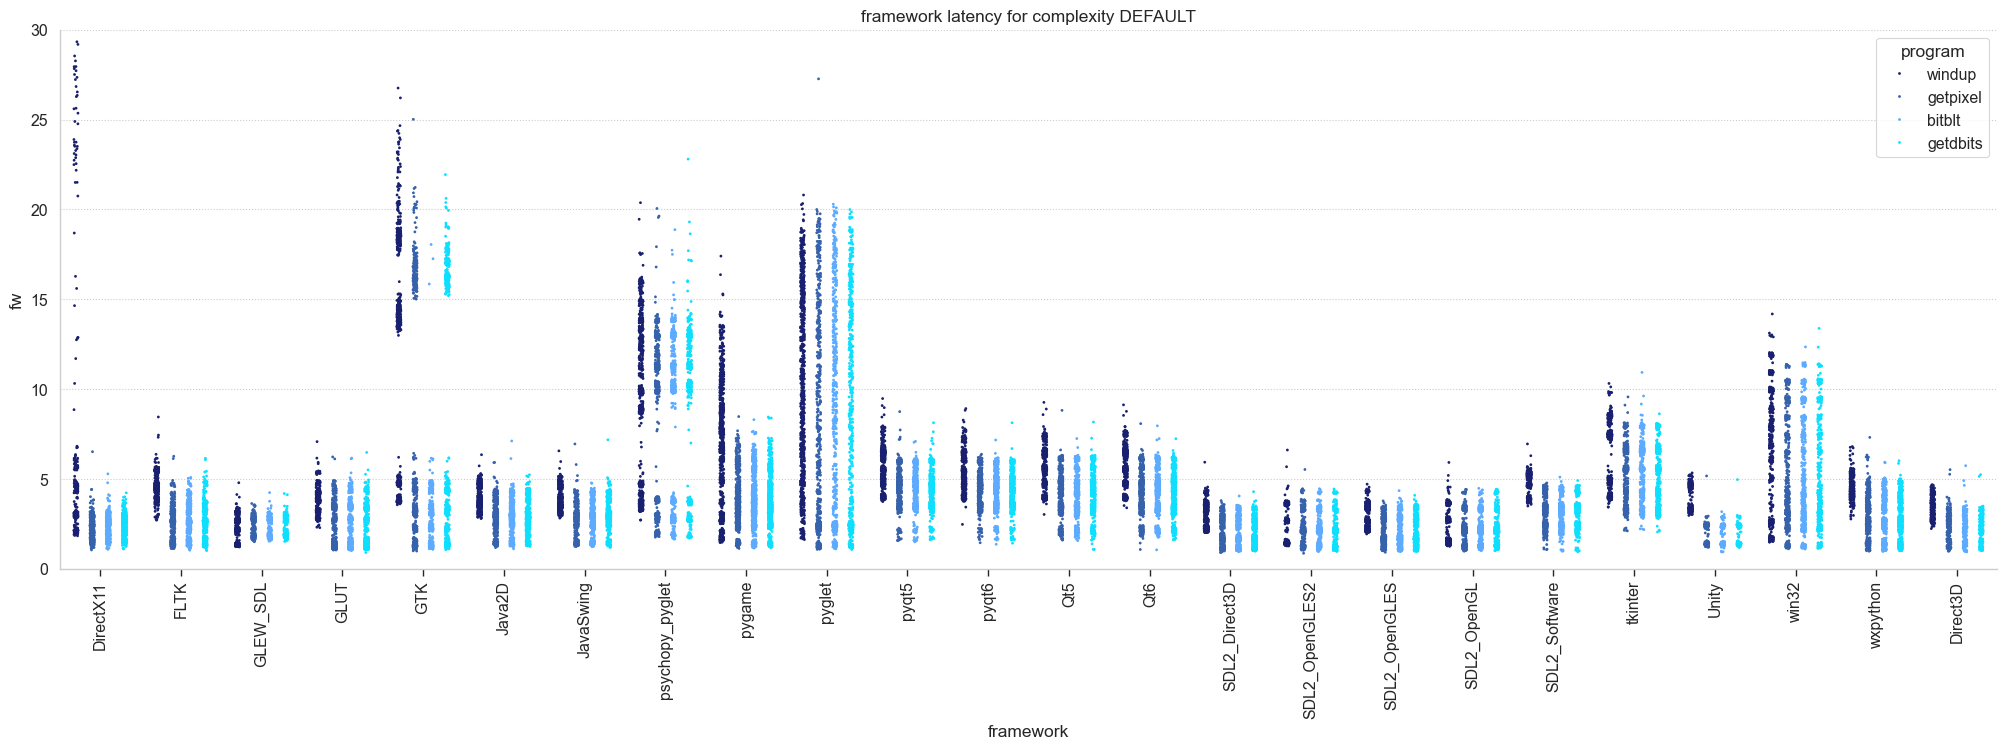

In [26]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == 'default']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_BLUES, size=2)

plot.set_ylim(0, 30)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity DEFAULT')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\2658324934.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


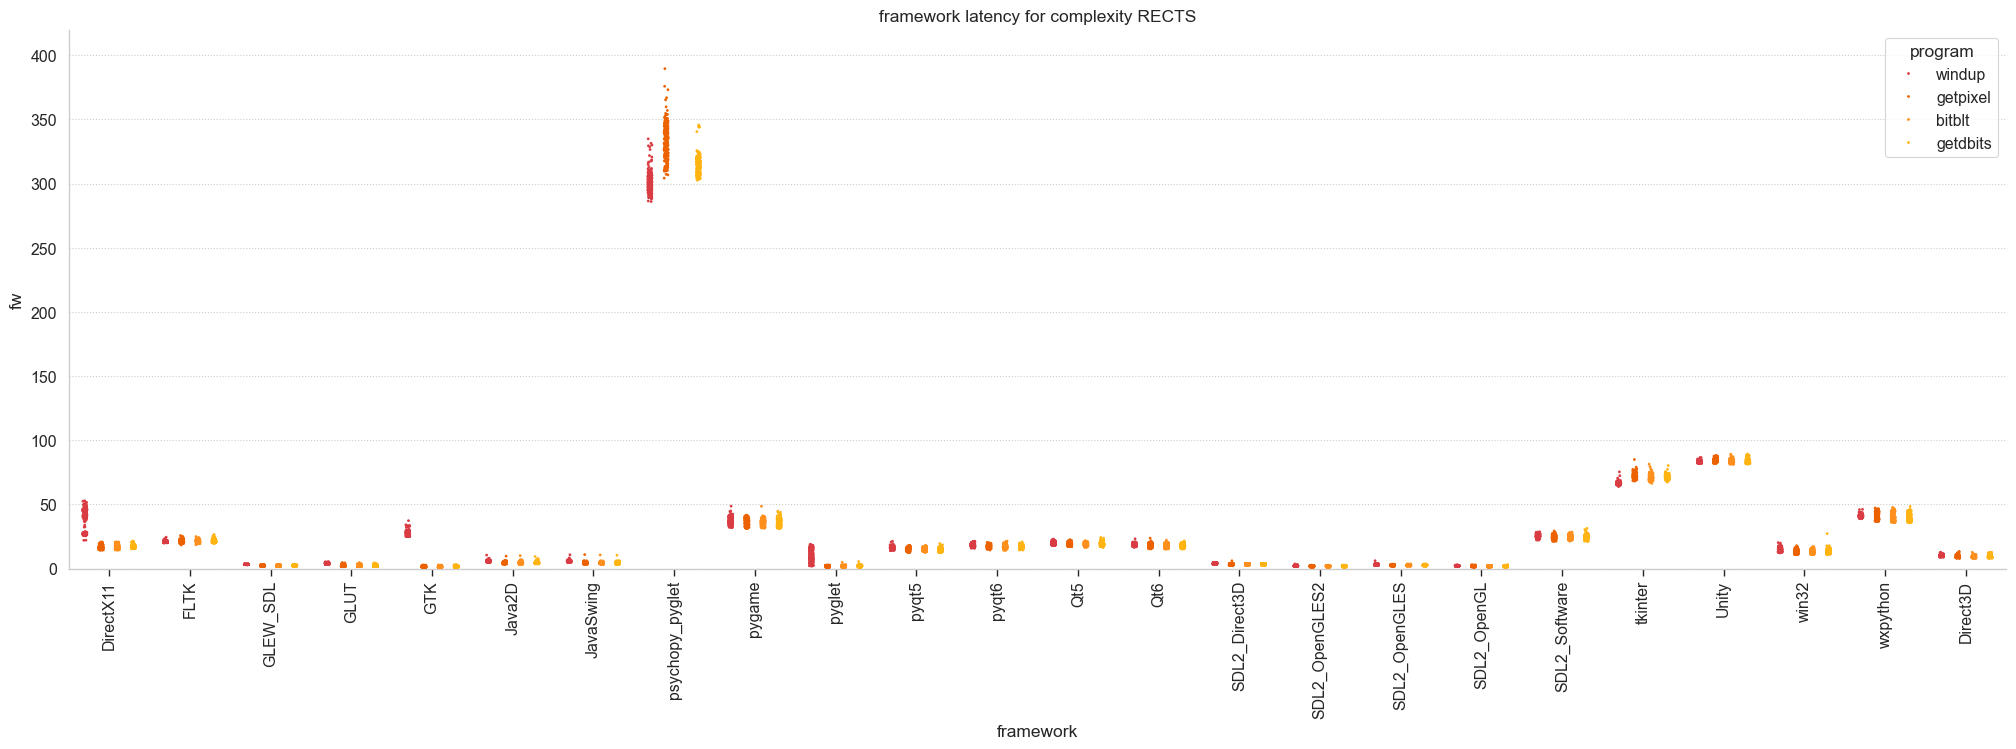

In [33]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == 'rects']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_REDS, size=2)

plot.set_ylim(0, 420)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity RECTS')
sns.despine(bottom = False, left = False)

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_16112\974564237.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


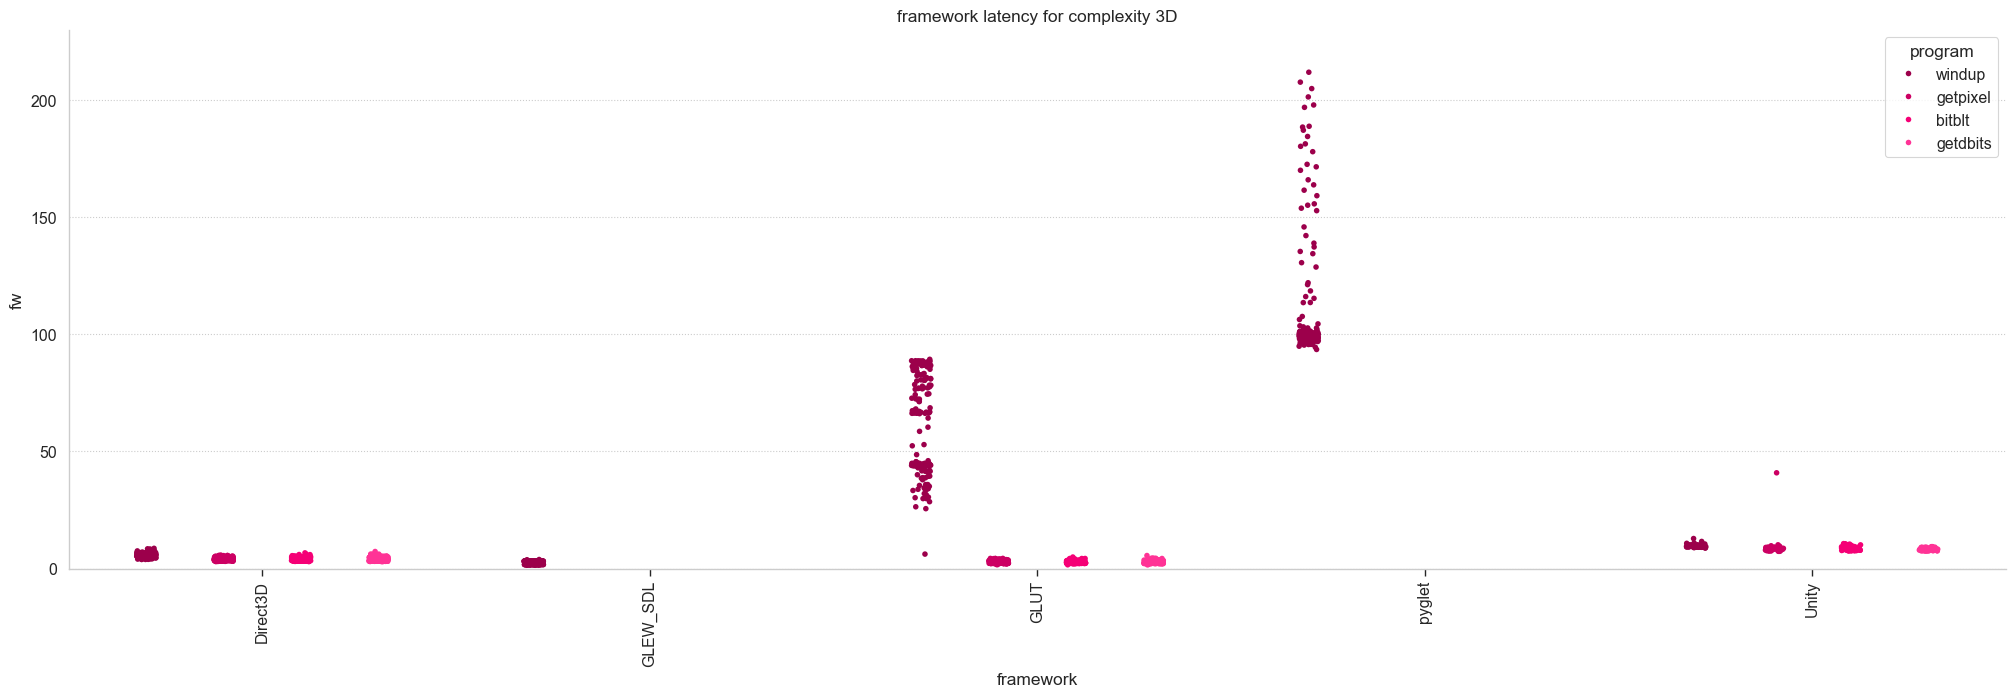

In [31]:
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData

data_temp = data[data['complexity'] == '3D']
plot = sns.stripplot(data=data_temp, x='framework', y='fw', hue='program', hue_order=['windup', 'getpixel', 'bitblt', 'getdbits'], dodge=True, palette=PALETTE_HEIDENELKE, size=4)

plot.set_ylim(0, 230)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plot.set_title('framework latency for complexity 3D')
sns.despine(bottom = False, left = False)